In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Data importing


In [75]:
df =  pd.read_excel('Online Retail.xlsx')

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Inspecting the data

In [8]:
copy_df =  df.copy()

In [9]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
copy_df.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [12]:
copy_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
copy_df.isna().sum()/len(copy_df)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [15]:
copy_df.dropna(inplace=True)

#### There is missing values in column Description by 0.27% because it very small amount we will drop the null values and also there is missing values in column CustomerID by 24.9% it's large amount but we will drop the null because it very important to know the customer ID later in the analysis

In [18]:
print('Before the drop of null values', df.shape)
print('After the drop of null values',copy_df.shape)

Before the drop of null values (541909, 8)
After the drop of null values (406829, 8)


In [19]:
copy_df.Description

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 406829, dtype: object

In [29]:
copy_df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity",ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409


### Remove the cancel orders 

In [30]:
copy_df.InvoiceNo.str.contains("C").count()

8905

In [31]:
copy_df[~copy_df.InvoiceNo.str.contains("C",na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [32]:
copy_df["TotalPrice"] = copy_df.Quantity * copy_df.UnitPrice

In [33]:
copy_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### RFM Analysis

In [34]:
import datetime as dt

In [35]:
copy_df.InvoiceDate.max() # Get the last date in the data

Timestamp('2011-12-09 12:50:00')

In [36]:
today_date= dt.datetime(2011,12,11)

In [40]:
rfm = copy_df.groupby('CustomerID').agg({
    "InvoiceDate": lambda date: (today_date -date.max()).days,
    "InvoiceNo":lambda num: num.nunique(),
    "TotalPrice":lambda TotalPrice : TotalPrice.sum(),
})

In [41]:
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [44]:
rfm.columns=['Recency','Frequency', 'Monetary']
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [45]:
rfm = rfm[rfm.Monetary >0]
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
12352.0,37,11,1545.41
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [46]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4320.0,90.892130,99.142113,1.000000e+00,17.000,50.00,139.00,374.00
Frequency,4320.0,5.117130,9.386392,1.000000e+00,1.000,3.00,6.00,248.00
Monetary,4320.0,1924.373832,8264.936833,7.105427e-15,302.435,657.85,1626.26,279489.02


### Bining the data and rate from 1 to 5

In [49]:
rfm["recency_score"] = pd.qcut(rfm.Recency,5, labels=[5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm.Frequency.rank(method='first'),5, labels=[1,2,3,4,5])
rfm["monetary_score"] = pd.qcut(rfm.Monetary,5, labels=[1,2,3,4,5])

In [50]:
rfm

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12347.0,3,7,4310.00,5,4,5
12348.0,76,4,1797.24,2,3,4
12349.0,19,1,1757.55,4,1,4
12350.0,311,1,334.40,1,1,2
12352.0,37,11,1545.41,3,5,4
...,...,...,...,...,...,...
18280.0,278,1,180.60,1,2,1
18281.0,181,1,80.82,1,2,1
18282.0,8,3,176.60,5,3,1


In [52]:
rfm['RFM_SCORE'] = (rfm.recency_score.astype(str)+ rfm.frequency_score.astype(str))

In [53]:
rfm

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12347.0,3,7,4310.00,5,4,5,54
12348.0,76,4,1797.24,2,3,4,23
12349.0,19,1,1757.55,4,1,4,41
12350.0,311,1,334.40,1,1,2,11
12352.0,37,11,1545.41,3,5,4,35
...,...,...,...,...,...,...,...
18280.0,278,1,180.60,1,2,1,12
18281.0,181,1,80.82,1,2,1,12
18282.0,8,3,176.60,5,3,1,53


### Make segmentation for each group of customers

In [55]:
segementation_map ={
    r'[1-2][1-2]':'hibernating',
    r'[1-2][3-4]':'at_Risk',
    r'[1-2]5':'cant_loose',
    r'3[1-2]':'about_to_sleep',
    r'33':'need_attention',
    r'[3-4][4-5]':'loyal_customers',
    r'41':'promising',
    r'51':'new_customers',
    r'[4-5][2-3]':'potential_loyalists',
    r'5[4-5]':'champions',
}
rfm['segement'] = rfm.RFM_SCORE.replace(segementation_map, regex =True)

In [56]:
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segement
CustomerID,,,,,,,,
12347.0,3,7,4310.00,5,4,5,54,champions
12348.0,76,4,1797.24,2,3,4,23,at_Risk
12349.0,19,1,1757.55,4,1,4,41,promising
12350.0,311,1,334.40,1,1,2,11,hibernating
12352.0,37,11,1545.41,3,5,4,35,loyal_customers


In [60]:
rfm[['segement','Recency','Frequency','Monetary']].groupby('segement').agg(['mean','count','max']).round(2)

Recency            Frequency            Monetary        \
                       mean count  max      mean count  max     mean count   
segement                                                                     
about_to_sleep        52.25   360   71      1.30   360    2   439.89   360   
at_Risk              155.70   605  373      3.35   605    7   969.75   605   
cant_loose           132.30    70  313      9.77    70   35  2383.26    70   
champions              6.09   659   12     14.69   659  248  6552.27   659   
hibernating          213.62  1037  374      1.21  1037    2   399.95  1037   
loyal_customers       32.70   776   71      8.07   776   76  2732.94   776   
need_attention        49.20   178   71      2.67   178    4   821.47   178   
new_customers          7.24    42   12      1.00    42    1   377.23    42   
potential_loyalists   16.48   497   32      2.25   497    4   717.29   497   
promising             23.19    96   32      1.00    96    1   306.21    96   

                                
                           max  
segement                        
about_to_sleep         6207.67  
at_Risk               21535.90  
cant_loose            10217.48  
champions            279489.02  
hibernating            7829.89  
loyal_customers      123725.45  
need_attention         3545.69  
new_customers          3861.00  
potential_loyalists   12393.70  
promising              1757.55

### Time series analysis

In [91]:
df_ts =df.copy()

In [92]:
df_ts.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [93]:
df_ts['InvoiceDate'] = df_ts['InvoiceDate'].astype(str)
df_ts['InvoiceDate'] = df_ts['InvoiceDate'].str.split()
df_ts['InvoiceDate'] = df_ts['InvoiceDate'].str.get(0)

In [94]:
df_ts

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


In [99]:
df_ts['InvoiceDate'] = pd.to_datetime(df_ts['InvoiceDate'])
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [100]:
df_ts.set_index('InvoiceDate', inplace=True)


In [101]:
df_ts.index

DatetimeIndex(['2010-12-01', '2010-12-01', '2010-12-01', '2010-12-01',
               '2010-12-01', '2010-12-01', '2010-12-01', '2010-12-01',
               '2010-12-01', '2010-12-01',
               ...
               '2011-12-09', '2011-12-09', '2011-12-09', '2011-12-09',
               '2011-12-09', '2011-12-09', '2011-12-09', '2011-12-09',
               '2011-12-09', '2011-12-09'],
              dtype='datetime64[ns]', name='InvoiceDate', length=541909, freq=None)

In [105]:
df_ts['2010-12']

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
2010-12-23,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,1.25,NaN,United Kingdom
2010-12-23,539991,72741,GRAND CHOCOLATECANDLE,4,1.45,NaN,United Kingdom
2010-12-23,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,3.75,NaN,United Kingdom


In [104]:
df_ts['2010-12'].Quantity.mean()

8.056025046491373

In [114]:
df_ts['2010-11-07':"2010-12-01"]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
2010-12-01,536597,35271S,GOLD PRINT PAPER BAG,14,0.19,18011.0,United Kingdom
2010-12-01,536597,21380,WOODEN HAPPY BIRTHDAY GARLAND,1,2.95,18011.0,United Kingdom
2010-12-01,536597,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,1,0.85,18011.0,United Kingdom


<Axes: xlabel='InvoiceDate'>

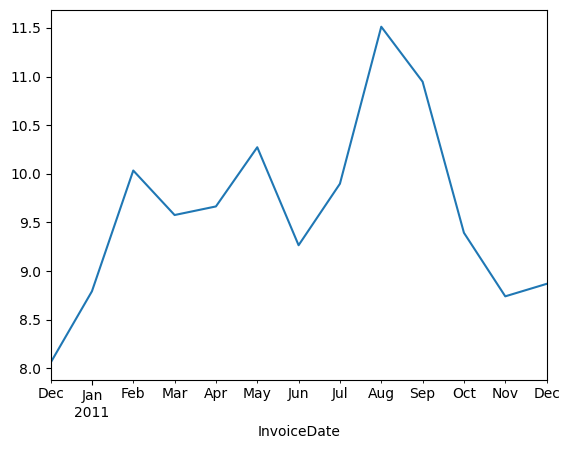

In [115]:
df_ts.Quantity.resample('M').mean().plot()

<Axes: xlabel='InvoiceDate'>

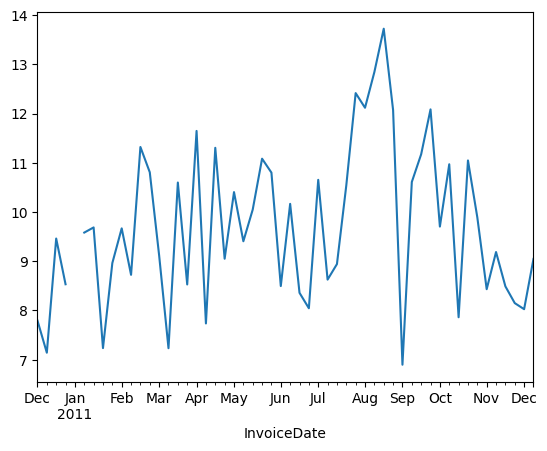

In [116]:
df_ts.Quantity.resample('W').mean().plot()